In [45]:
import pandas as pd
from config import api_key
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
culture_data_df = pd.read_csv("Cleaned_Date_Culture_Data.csv", index_col=0)
dna_data_df = pd.read_csv("Cleaned_Date_DNA_Data.csv", index_col=0)

In [3]:
culture_data_df.head()

,Culture Test ID,Culture Sample 1 Timestamp,Beach,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Latitude,Longitude,Sample Date,Sample Time
2231,113666.0,2016-08-04 08:30:00,Humboldt,1.0,1.0,1.0,41.90643,-87.703717,2016-08-04,08:30:00
2374,112689.0,2016-06-01 07:15:00,Calumet,629.0,1300.0,904.3,41.71420,-87.529900,2016-06-01,07:15:00
2375,112669.0,2016-06-01 08:00:00,Calumet,345.0,517.0,422.3,41.71420,-87.529900,2016-06-01,08:00:00
4980,109008.0,2013-05-26 00:00:00,57th Street,17.0,20.0,18.4,41.79110,-87.579700,2013-05-26,00:00:00
4983,93134.0,2015-07-07 00:00:00,Leone,727.0,727.0,727.0,42.01310,-87.663500,2015-07-07,00:00:00


In [4]:
dna_data_df.head()

,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Sample Date,Sample Time
3,10601.0,2019-06-03 12:08:00,63rd Street,15.0,121.0,42.6,41.7827,-87.5748,2019-06-03,12:08:00
4,10600.0,2019-06-03 12:08:00,South Shore,1006.0,16.0,126.9,41.7689,-87.5636,2019-06-03,12:08:00
5,10582.0,2019-06-03 12:10:00,North Avenue,69.0,8.0,23.5,41.9148,-87.6273,2019-06-03,12:10:00
6,10646.0,2019-06-03 12:12:00,Howard,90.0,169.0,123.3,42.0188,-87.6663,2019-06-03,12:12:00
7,10599.0,2019-06-03 12:08:00,Rainbow,150.0,245.0,191.7,41.7580,-87.5510,2019-06-03,12:08:00


In [5]:
len(culture_data_df["Sample Date"].unique())

961

In [6]:
len(dna_data_df["Sample Date"].unique())

433

In [7]:
culture_sample_date_list = culture_data_df["Sample Date"].unique()
dna_sample_date_list = dna_data_df["Sample Date"].unique()

In [31]:
city = "Milwaukee"
timeframe = [0, 1, 2, 3, 4, 5, 6, 7]
rain_sum = 0
date_list = []
rain_sum_list = []

for date in culture_sample_date_list:
## Will need to implement a loop to go through all the dates
    try:
        url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={api_key}&q={city}&format=json&num_of_days=0&date={date}"
        weather_response = requests.get(url)
        weather_json = weather_response.json()
        print(f"Getting precipitation data for {date}")
        
        for i in timeframe:
            rain_interval = pd.to_numeric(weather_json["data"]["weather"][0]["hourly"][i]["precipInches"])
            rain_sum += rain_interval
    
        date_list.append(date)
        rain_sum_list.append(rain_sum)
        
    
    except KeyError:
        print(f"No weather data for {date}")
    
    rain_sum = 0
    rain_interval = 0

Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-08-04
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2016-06-01
Getting precipitation data for 2013-05-26
Getting precipitation data for 2013-05-26
Getting precipitation data for 2013-05-26
Getting precipitation data for 2013-05-26
Getting precipitation data for 2013-05-26
Getting precipitation data for 2013-05-26
Getting precipitation data for 2013-05-26
Getting precipitation data for 201

Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2014-06-12
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2010-07-14
Getting precipitation data for 2009-06-04
Getting precipitation data for 2009-06-04
Getting precipitation data for 2009-06-04
Getting precipitation data for 2009-06-04
Getting precipitation data for 2009-06-04
Getting precipitation data for 2009-06-04
Getting precipitation data for 2009-06-04
Getting precipitation data for 200

Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2012-06-19
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2011-07-28
Getting precipitation data for 2015-06-08
Getting precipitation data for 2015-06-08
Getting precipitation data for 2015-06-08
Getting precipitation data for 2015-06-08
Getting precipitation data for 2015-06-08
Getting precipitation data for 2015-06-08
Getting precipitation data for 2015-06-08
Getting precipitation data for 201

Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2015-05-20
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2014-07-07
Getting precipitation data for 2006-08-17
No weather data for 2006-08-17
Getting precipitation data for 2007-08-07
No weather data for 2007-08-07
Getting precipitation data for 2006-08-08
No weather data for 2006-08-08
Getting precipitation data for 2010-06-15
Getting precipitation data for 2010-06-15
Getting precipitation dat

Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2015-07-13
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2012-08-03
Getting precipitation data for 2009-07-30
Getting precipitation data for 2009-07-30
Getting precipitation data for 2009-07-30
Getting precipitation data for 2009-07-30
Getting precipitation data for 2009-07-30
Getting precipitation data for 2009-07-30
Getting precipitation data for 2009-07-30
Getting precipitation data for 200

Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2016-08-02
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2008-07-17
Getting precipitation data for 2016-08-11
Getting precipitation data for 2016-08-11
Getting precipitation data for 2016-08-11
Getting precipitation data for 2016-08-11
Getting precipitation data for 2016-08-11
Getting precipitation data for 2016-08-11
Getting precipitation data for 2016-08-11
Getting precipitation data for 201

Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2013-08-26
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2008-07-24
Getting precipitation data for 2013-05-25
Getting precipitation data for 2013-05-25
Getting precipitation data for 2013-05-25
Getting precipitation data for 2013-05-25
Getting precipitation data for 2013-05-25
Getting precipitation data for 2013-05-25
Getting precipitation data for 2013-05-25
Getting precipitation data for 201

Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2008-07-25
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2015-06-11
Getting precipitation data for 2013-06-13
Getting precipitation data for 2013-06-13
Getting precipitation data for 2013-06-13
Getting precipitation data for 2013-06-13
Getting precipitation data for 2013-06-13
Getting precipitation data for 2013-06-13
Getting precipitation data for 2013-06-13
Getting precipitation data for 201

Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2013-07-15
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2014-06-11
Getting precipitation data for 2007-05-31
No weather data for 2007-05-31
Getting precipitation data for 2006-08-25
No weather data for 2006-08-25
Getting precipitation data for 2006-05-24
No weather data for 2006-05-24
Getting precipitation data for 2015-08-25
Getting precipitation data for 2015-08-25
Getting precipitation dat

Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2010-07-06
Getting precipitation data for 2007-06-20
No weather data for 2007-06-20
Getting precipitation data for 2007-07-04
No weather data for 2007-07-04
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2015-09-03
Getting precipitation data for 2013-08-09
Getting precipitation data for 2013-08-09
Getting precipitation data for 2013-08-09
Getting precipitation data for 2013-08-09
Getting precip

Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2010-08-30
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2009-05-22
Getting precipitation data for 2007-07-25
No weather data for 2007-07-25
Getting precipitation data for 2009-07-17
Getting precipitation data for 2009-07-17
Getting precipitation data for 2009-07-17
Getting precipitation data for 2009-07-17
Getting precipitation data for 2009-07-17
Getting precipitation data for 2009-07-17
Get

Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2010-06-22
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-06-18
Getting precipitation data for 2013-07-24
Getting precipitation data for 2013-07-24
Getting precipitation data for 2013-07-24
Getting precipitation data for 2013-07-24
Getting precipitation data for 2013-07-24
Getting precipitation data for 2013-07-24
Getting precipitation data for 2013-07-24
Getting precipitation data for 201

Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2014-07-16
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2016-05-27
Getting precipitation data for 2007-08-11
No weather data for 2007-08-11
Getting precipitation data for 2009-06-23
Getting precipitation data for 2009-06-23
Getting precipitation data for 2009-06-23
Getting precipitation data for 2009-06-23
Getting precipitation data for 2009-06-23
Getting precipitation data for 2009-06-23
Get

Getting precipitation data for 2007-07-30
No weather data for 2007-07-30
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-21
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2012-07-17
Getting precipitation data for 2008-06-12
No weather data for 2008-06-12
Getting precipitation data for 2011-07-22
Getting precipitation data for 2011-07-22
Getting precipitation data for 2011-07-22
Getting precipitation data for 2011-07-22
Getting precip

Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2008-07-21
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-06-16
Getting precipitation data for 2011-07-23
Getting precipitation data for 2011-07-23
Getting precipitation data for 2011-07-23
Getting precipitation data for 2011-07-23
Getting precipitation data for 2011-07-23
Getting precipitation data for 2011-07-23
Getting precipitation data for 2011-07-23
Getting precipitation data for 201

Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2009-08-05
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2011-06-22
Getting precipitation data for 2006-07-26
No weather data for 2006-07-26
Getting precipitation data for 2012-08-14
Getting precipitation data for 2012-08-14
Getting precipitation data for 2012-08-14
Getting precipitation data for 2012-08-14
Getting precipitation data for 2012-08-14
Getting precipitation data for 2012-08-14
Get

Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2008-08-22
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2011-07-21
Getting precipitation data for 2009-08-03
Getting precipitation data for 2009-08-03
Getting precipitation data for 2009-08-03
Getting precipitation data for 2009-08-03
Getting precipitation data for 2009-08-03
Getting precipitation data for 2009-08-03
Getting precipitation data for 2009-08-03
Getting precipitation data for 200

Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2011-07-02
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2008-08-18
Getting precipitation data for 2007-08-25
No weather data for 2007-08-25
Getting precipitation data for 2013-08-30
Getting precipitation data for 2013-08-30
Getting precipitation data for 2013-08-30
Getting precipitation data for 2013-08-30
Getting precipitation data for 2013-08-30
Getting precipitation data for 2013-08-30
Get

Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2011-08-01
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2012-05-30
Getting precipitation data for 2010-06-01
Getting precipitation data for 2010-06-01
Getting precipitation data for 2010-06-01
Getting precipitation data for 2010-06-01
Getting precipitation data for 2010-06-01
Getting precipitation data for 2010-06-01
Getting precipitation data for 2010-06-01
Getting precipitation data for 201

KeyboardInterrupt: 

In [34]:
culture_rainfall_dict = {"Date": date_list, "Rainfall (In)": rain_sum_list}
culture_rainfall_df = pd.DataFrame(culture_rainfall_dict)
culture_rainfall_df = culture_rainfall_df.sort_values(by="Date")
culture_rainfall_df

,Date,Rainfall (In)
0,2016-08-04,0.0
1,2016-06-01,0.0
2,2013-05-26,0.0
3,2015-07-07,0.0
4,2015-07-02,0.0
...,...,...
435,2016-05-31,0.0
436,2011-06-06,0.0
437,2008-07-28,0.0
438,2012-07-19,0.0


In [ ]:
culture_rainfall_df = culture_rainfall_df.sort_values(by="Date")

In [37]:
culture_rainfall_df.loc[culture_rainfall_df["Rainfall (In)"] != 0.0]
# Making sure that I'm not just getting 0 for everything 

,Date,Rainfall (In)
7,2014-08-19,0.1
104,2010-07-08,0.1
133,2009-06-19,0.3
259,2011-08-02,0.1
268,2012-08-31,0.1


In [38]:
city = "Milwaukee"
timeframe = [0, 1, 2, 3, 4, 5, 6, 7]
rain_sum = 0
date_list = []
rain_sum_list = []

for date in dna_sample_date_list:
## Will need to implement a loop to go through all the dates
    try:
        url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={api_key}&q={city}&format=json&num_of_days=0&date={date}"
        weather_response = requests.get(url)
        weather_json = weather_response.json()
        print(f"Getting precipitation data for {date}")
        
        for i in timeframe:
            rain_interval = pd.to_numeric(weather_json["data"]["weather"][0]["hourly"][i]["precipInches"])
            rain_sum += rain_interval
    
        date_list.append(date)
        rain_sum_list.append(rain_sum)
        
    
    except KeyError:
        print(f"No weather data for {date}")
    
    rain_sum = 0
    rain_interval = 0

Getting precipitation data for 2019-06-03
Getting precipitation data for 2019-06-04
Getting precipitation data for 2020-07-06
Getting precipitation data for 2020-07-08
Getting precipitation data for 2019-06-05
Getting precipitation data for 2019-06-06
Getting precipitation data for 2020-07-07
Getting precipitation data for 2019-06-07
Getting precipitation data for 2019-06-08
Getting precipitation data for 2019-06-09
Getting precipitation data for 2019-06-10
Getting precipitation data for 2019-06-11
Getting precipitation data for 2019-06-12
Getting precipitation data for 2019-06-13
Getting precipitation data for 2019-06-14
Getting precipitation data for 2019-06-15
Getting precipitation data for 2019-06-16
Getting precipitation data for 2019-06-17
Getting precipitation data for 2019-06-18
Getting precipitation data for 2019-06-19
Getting precipitation data for 2019-06-20
Getting precipitation data for 2019-06-21
Getting precipitation data for 2019-06-22
Getting precipitation data for 201

Getting precipitation data for 2018-07-09
Getting precipitation data for 2019-05-29
Getting precipitation data for 2018-08-19
Getting precipitation data for 2018-08-22
Getting precipitation data for 2015-06-01
Getting precipitation data for 2018-06-10
Getting precipitation data for 2018-07-04
Getting precipitation data for 2017-07-17
Getting precipitation data for 2018-06-29
Getting precipitation data for 2015-07-17
Getting precipitation data for 2018-06-23
Getting precipitation data for 2017-07-29
Getting precipitation data for 2017-06-16
Getting precipitation data for 2018-05-25
Getting precipitation data for 2018-07-23
Getting precipitation data for 2018-06-06
Getting precipitation data for 2018-07-06
Getting precipitation data for 2017-08-23
Getting precipitation data for 2018-06-20
Getting precipitation data for 2018-05-28
Getting precipitation data for 2017-08-17
Getting precipitation data for 2018-05-30
Getting precipitation data for 2017-06-14
Getting precipitation data for 201

Getting precipitation data for 2015-06-04
Getting precipitation data for 2018-09-01
Getting precipitation data for 2015-08-11
Getting precipitation data for 2015-07-29
Getting precipitation data for 2015-07-15
Getting precipitation data for 2018-08-17
Getting precipitation data for 2015-08-14
Getting precipitation data for 2017-06-03
Getting precipitation data for 2018-07-14
Getting precipitation data for 2017-06-17
Getting precipitation data for 2018-06-12
Getting precipitation data for 2018-06-09
Getting precipitation data for 2018-08-02
Getting precipitation data for 2018-06-25
Getting precipitation data for 2015-05-28
Getting precipitation data for 2018-06-24
Getting precipitation data for 2015-07-02
Getting precipitation data for 2015-06-09
Getting precipitation data for 2017-06-18
Getting precipitation data for 2015-07-21
Getting precipitation data for 2015-07-14
Getting precipitation data for 2018-07-10
Getting precipitation data for 2017-08-22
Getting precipitation data for 201

In [40]:
dna_rainfall_dict = {"Date": date_list, "Rainfall (In)": rain_sum_list}
dna_rainfall_df = pd.DataFrame(dna_rainfall_dict)
dna_rainfall_df = dna_rainfall_df.sort_values(by="Date")
dna_rainfall_df

,Date,Rainfall (In)
0,2019-06-03,0.0
1,2019-06-04,0.0
2,2020-07-06,0.0
3,2020-07-08,0.1
4,2019-06-05,0.0
...,...,...
428,2015-06-26,0.0
429,2015-07-31,0.0
430,2015-06-03,0.0
431,2015-07-24,0.0


<BarContainer object of 433 artists>

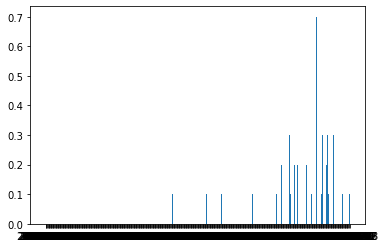

In [48]:
plt.bar(dna_rainfall_df["Date"], dna_rainfall_df["Rainfall (In)"])
## Maybe group by month or year? There is too much data

In [42]:
dna_rainfall_df.loc[dna_rainfall_df["Rainfall (In)"] != 0.0]

,Date,Rainfall (In)
3,2020-07-08,0.1
6,2020-07-07,0.2
12,2019-06-12,0.3
13,2019-06-13,0.1
19,2019-06-19,0.2
23,2019-06-23,0.2
24,2019-06-24,0.5
28,2019-06-28,0.3
32,2019-07-02,0.1
33,2019-05-25,0.4
